In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 17.9 MB 23.6 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=0464d59afb6e36b1edeeff493a14b9626cbd488f58d12a6fca390154e42353b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-be_zuhw_/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=573d

In [ ]:
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport

# Cargar el dataset con las nuevas columnas
df = pd.read_csv('Pasajeros_movilizados(new).csv', encoding='utf-8')  # Ajusta el nombre del archivo

# Generar el informe
informe = ProfileReport(
    df,
    title="Análisis Exploratorio: Pasajeros y Eventos en Medellín",
    explorative=True,
    vars={"num": {"low_categorical_threshold": 0}}  # Tratar variables numéricas con pocos valores únicos como categóricas
)

# Guardar el informe en HTML
informe.to_file("analisis_pasajeros.html")

<ipython-input-2-561a74119999>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:00<00:00, 65.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

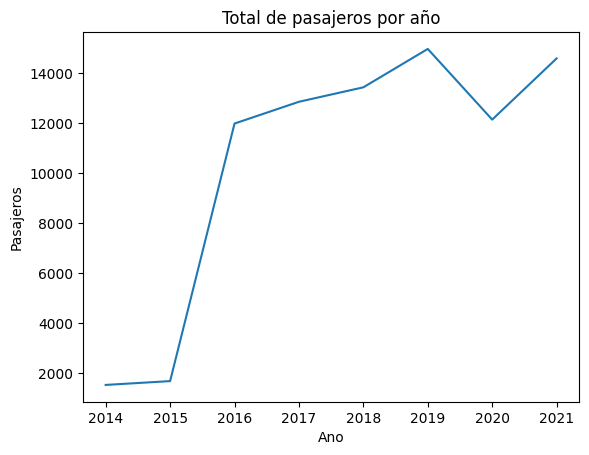

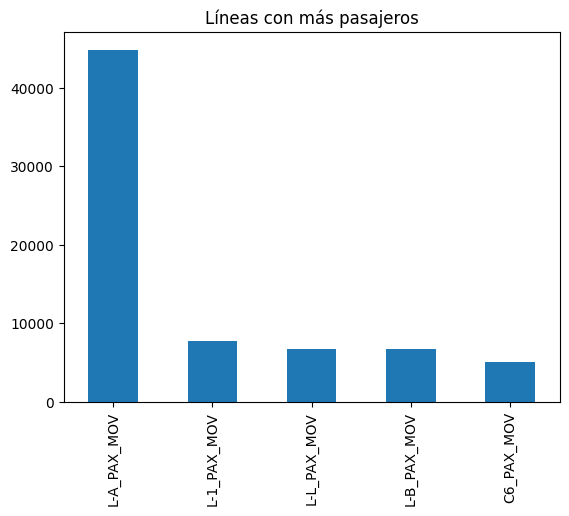

In [ ]:
import matplotlib.pyplot as plt
pax_columns = [col for col in df.columns if col.endswith('_PAX_MOV')]

# 1. Evolución anual de pasajeros
df.groupby('Ano')[pax_columns].sum().sum(axis=1).plot()
plt.title('Total de pasajeros por año')
plt.ylabel('Pasajeros')
plt.show()

# 2. Top 5 líneas más utilizadas
df[pax_columns].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Líneas con más pasajeros')
plt.show()

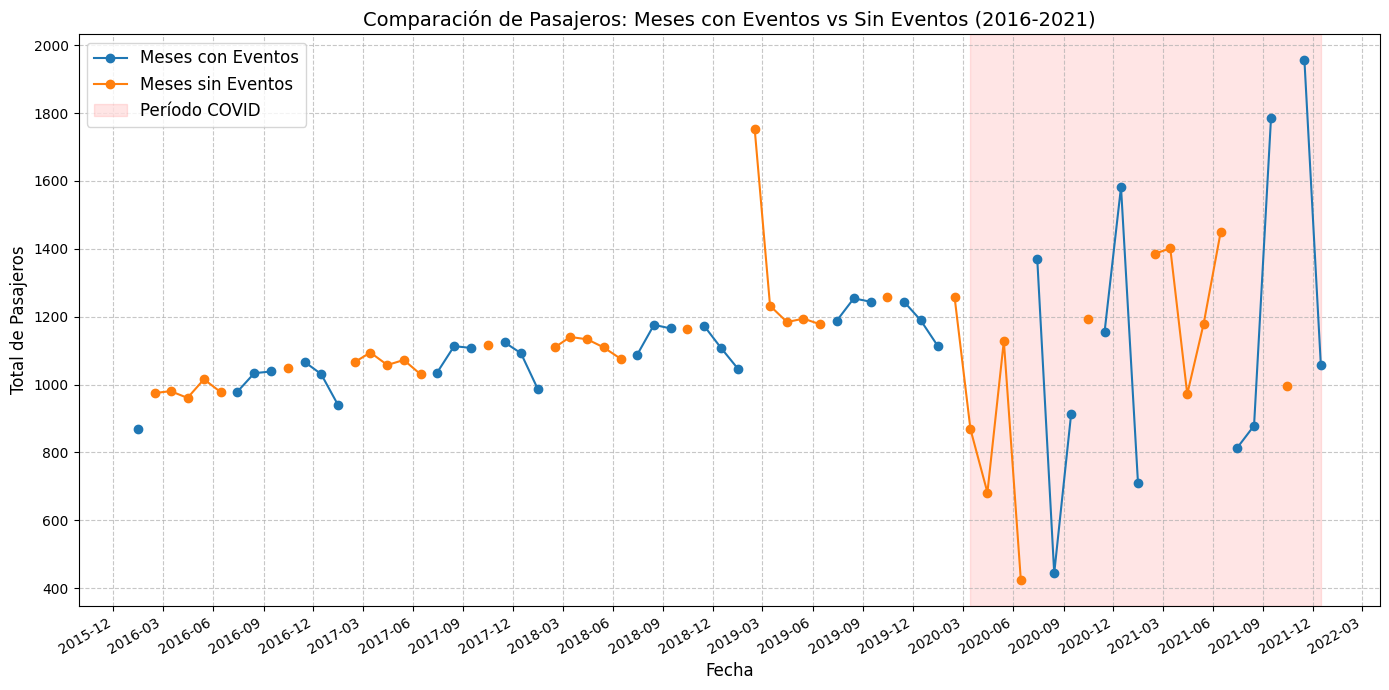

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Filtrar solo los meses con datos completos (2016-2021)
df = df[df['NUM_MES'].notna()].copy()

# Crear columna de fecha (asumiendo día 15 de cada mes para el plot)
df['Fecha'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['NUM_MES'].astype(int).astype(str) + '-15')

# Calcular el total de pasajeros por mes (suma de todas las líneas)
pax_columns = [col for col in df.columns if col.endswith('_PAX_MOV')]
df['Total_Pasajeros'] = df[pax_columns].sum(axis=1)



# Clasificar en dos grupos: con eventos y sin eventos
df['Tipo'] = df['Evento'].apply(lambda x: 'Con Evento' if x != 'Ningun evento importante' else 'Sin Evento')

# Agrupar por fecha y tipo
grouped = df.groupby(['Fecha', 'Tipo'])['Total_Pasajeros'].mean().unstack()

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Graficar ambas series
plt.plot(grouped.index, grouped['Con Evento'], label='Meses con Eventos', marker='o', color='#1f77b4')
plt.plot(grouped.index, grouped['Sin Evento'], label='Meses sin Eventos', marker='o', color='#ff7f0e')

# Destacar el período de pandemia
pandemic_start = pd.to_datetime('2020-03-15')
pandemic_end = pd.to_datetime('2021-12-15')
plt.axvspan(pandemic_start, pandemic_end, color='red', alpha=0.1, label='Período COVID')

# Formatear el eje de fechas
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

# Añadir elementos al gráfico
plt.title('Comparación de Pasajeros: Meses con Eventos vs Sin Eventos (2016-2021)', fontsize=14)
plt.ylabel('Total de Pasajeros', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

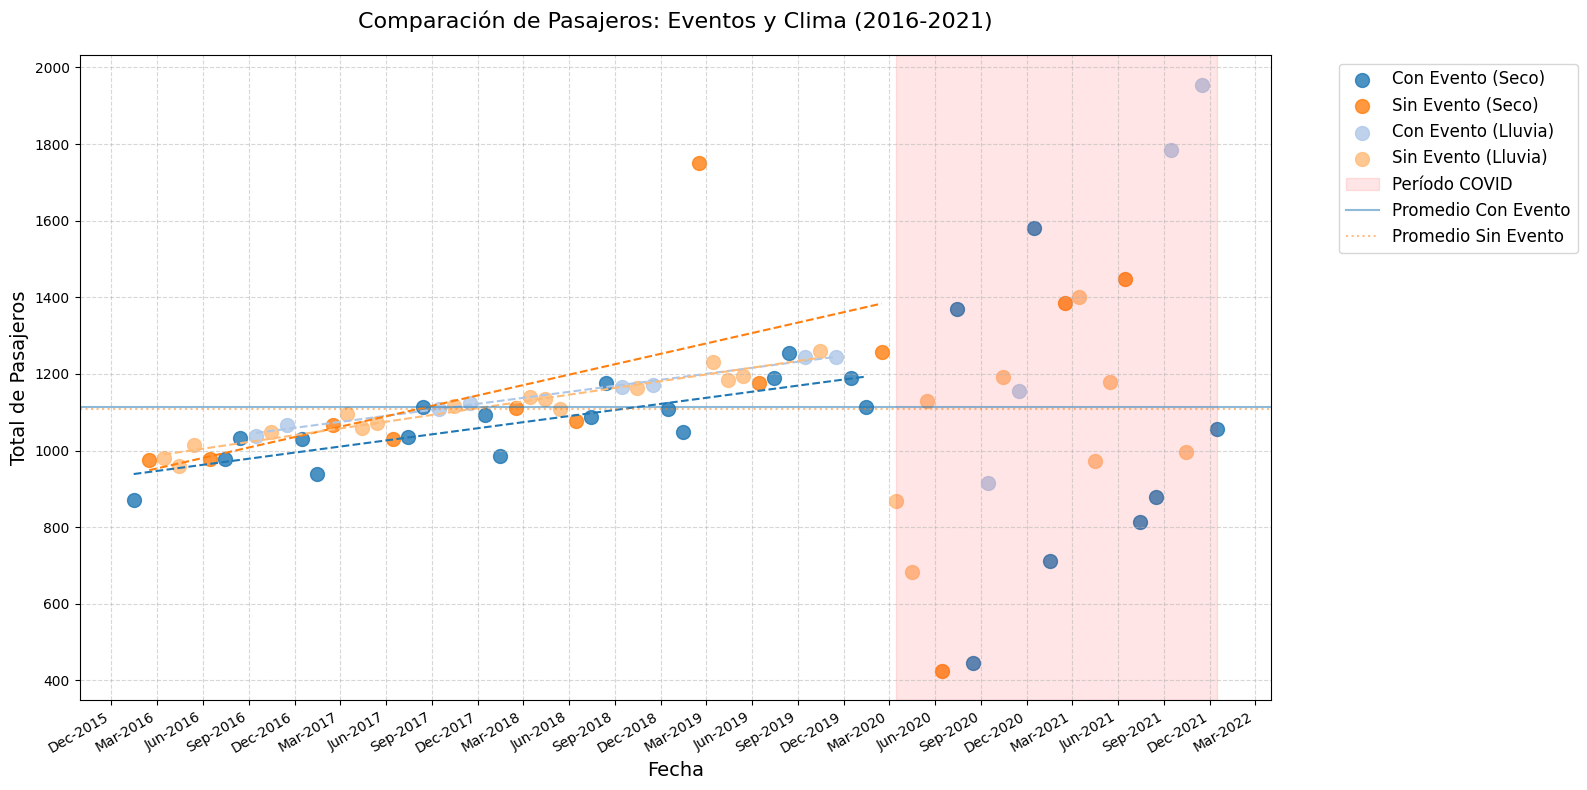

In [ ]:
import numpy as np

# Filtrar solo los meses con datos completos (2016-2021)
df = df[df['NUM_MES'].notna()].copy()

# Crear columna de fecha
df['Fecha'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['NUM_MES'].astype(int).astype(str) + '-15')

# Calcular el total de pasajeros
pax_columns = [col for col in df.columns if col.endswith('_PAX_MOV')]
df['Total_Pasajeros'] = df[pax_columns].sum(axis=1)

# Clasificar eventos y clima
df['Tipo'] = df['Evento'].apply(lambda x: 'Con Evento' if x != 'Ningun evento importante' else 'Sin Evento')
df['Clima'] = df['Clima'].replace({'Desconocido': 'Seco'})  # Tratar desconocidos como secos

# Configurar el gráfico
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Paleta de colores
colors = {
    ('Con Evento', 'Seco'): '#1f77b4',    # Azul fuerte
    ('Con Evento', 'Lluvia'): '#aec7e8',  # Azul claro
    ('Sin Evento', 'Seco'): '#ff7f0e',    # Naranja fuerte
    ('Sin Evento', 'Lluvia'): '#ffbb78'   # Naranja claro
}

# Graficar cada combinación de evento/clima
for (event_type, clima), color in colors.items():
    subset = df[(df['Tipo'] == event_type) & (df['Clima'] == clima)]
    if not subset.empty:
        label = f"{event_type} ({clima})"
        plt.scatter(subset['Fecha'], subset['Total_Pasajeros'],
                   label=label, color=color, s=100, alpha=0.8)

        # Graficar línea de tendencia (excluyendo pandemia)
        pre_pandemic = subset[subset['Fecha'] < pd.to_datetime('2020-03-15')]
        if len(pre_pandemic) > 1:
            z = np.polyfit(mdates.date2num(pre_pandemic['Fecha']), pre_pandemic['Total_Pasajeros'], 1)
            p = np.poly1d(z)
            plt.plot(pre_pandemic['Fecha'], p(mdates.date2num(pre_pandemic['Fecha'])),
                    color=color, linestyle='--', linewidth=1.5)

# Destacar el período de pandemia
pandemic_start = pd.to_datetime('2020-03-15')
pandemic_end = pd.to_datetime('2021-12-15')
plt.axvspan(pandemic_start, pandemic_end, color='red', alpha=0.1, label='Período COVID')

# Líneas horizontales de referencia
for event_type in ['Con Evento', 'Sin Evento']:
    avg = df[df['Tipo'] == event_type]['Total_Pasajeros'].mean()
    linestyle = '-' if event_type == 'Con Evento' else ':'
    plt.axhline(y=avg, color=colors[(event_type, 'Seco')], linestyle=linestyle,
                alpha=0.5, label=f'Promedio {event_type}')

# Formatear el eje de fechas
ax.xaxis.set_major_formatter(DateFormatter('%b-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

# Añadir elementos al gráfico
plt.title('Comparación de Pasajeros: Eventos y Clima (2016-2021)', fontsize=16, pad=20)
plt.ylabel('Total de Pasajeros', fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar leyenda
handles, labels = ax.get_legend_handles_labels()
order = [0, 2, 1, 3, 4, 5, 6]  # Reordenar para mejor presentación
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
           fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir anotaciones explicativas
plt.annotate('Mayor afluencia en eventos\ndurante clima seco',
             xy=(pd.to_datetime('2019-08-15'), 750000),
             xytext=(20, 20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
             arrowprops=dict(arrowstyle='->'))

plt.annotate('Efecto pandemia\nreduce la diferencia',
             xy=(pd.to_datetime('2020-07-15'), 300000),
             xytext=(-100, -40), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
             arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()